In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Retrieve the table names as a list
def get_tables():
    conn_string = "" # Removed for security
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor('Jefferson_Query', cursor_factory=psycopg2.extras.DictCursor)
    cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public'AND table_type='BASE TABLE';")
    table_names = cursor.fetchall()
    table_names = [item[0] for item in table_names]
    conn.close()
    return table_names

In [2]:
# Retrieve tables' column names as a list
def get_names(table_name):
    conn_string = ""
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor('Jefferson_Query', cursor_factory=psycopg2.extras.DictCursor)
    cursor.execute(("SELECT column_name FROM information_schema.columns WHERE table_name='%s';") % (table_name))
    names = cursor.fetchall()
    names = [item[0] for item in names]
    conn.close()
    return names

In [14]:
import time
start_time = time.time()

# Combine list of tables with list of column names to create a dictionary
table_names = pd.Series(get_tables())
all_names = [get_names(i) for i in table_names]

keys = table_names
values = all_names

table_dict = dict(zip(keys, values))
print table_dict

print("--- %s seconds ---" % (time.time() - start_time))

with open('DB_Tables_Dictionary.txt', 'w') as f:
    f.writelines('{}:{}\n'.format(k,v) for k, v in table_dict.items())

{'fec_reports': ['zip', 'rows'], 'live_forms': ['id', 'record', 'recordHash', 'createdAt', 'updatedAt'], 'users': ['id', 'createdAt', 'updatedAt', 'email', 'password', 'name', 'loginToken', 'passwordResetToken', 'lastLogin', 'loginTokenExpires', 'settings', 'following'], 'forms_expenditures_locations': ['formId', 'addressType', 'state', 'city', 'street1', 'street2', 'zipCode', 'latLng', 'hash'], 'SequelizeMeta': ['name'], 'live_forms_lookup': ['fecId', 'fecFile', 'formType', 'office', 'state', 'district', 'formId', 'amended'], 'forms': ['id', 'record', 'recordHash', 'createdAt', 'updatedAt'], 'amended_filings': ['amended', 'fecFile', 'processed'], 'user_feeds': ['userId', 'feedId'], 'feeds': ['rule', 'hashId', 'createdAt', 'updatedAt', 'id'], 'forms_expenditures': ['formId', 'fecId', 'fecFile', 'formType', 'amount', 'date', 'office', 'state', 'district', 'vendor', 'amended'], 'committees': ['fecId', 'name', 'lastActivity'], 'zipcodes': ['zip', 'city', 'state', 'latitude', 'longitude']}

In [17]:
T_Dict = open('DB_Tables_Dictionary.txt', 'r')

print T_Dict.read()

fec_reports:['zip', 'rows']
live_forms:['id', 'record', 'recordHash', 'createdAt', 'updatedAt']
users:['id', 'createdAt', 'updatedAt', 'email', 'password', 'name', 'loginToken', 'passwordResetToken', 'lastLogin', 'loginTokenExpires', 'settings', 'following']
forms_expenditures_locations:['formId', 'addressType', 'state', 'city', 'street1', 'street2', 'zipCode', 'latLng', 'hash']
SequelizeMeta:['name']
live_forms_lookup:['fecId', 'fecFile', 'formType', 'office', 'state', 'district', 'formId', 'amended']
forms:['id', 'record', 'recordHash', 'createdAt', 'updatedAt']
amended_filings:['amended', 'fecFile', 'processed']
user_feeds:['userId', 'feedId']
feeds:['rule', 'hashId', 'createdAt', 'updatedAt', 'id']
forms_expenditures:['formId', 'fecId', 'fecFile', 'formType', 'amount', 'date', 'office', 'state', 'district', 'vendor', 'amended']
committees:['fecId', 'name', 'lastActivity']
zipcodes:['zip', 'city', 'state', 'latitude', 'longitude']



In [4]:
# Sample n records specified by 'num_rec' from the head of the database named 'db_name' 
def Samp(db_name, num_rec):
    conn_string = ""
    conn = psycopg2.connect(conn_string)
    cursor = conn.cursor()
    ex = "SELECT * FROM %s LIMIT %i;" % (db_name, num_rec)
    cursor.execute(ex) 
    x = cursor.fetchall()
    conn.close()
    dic = '%s' % (db_name)
    a = pd.DataFrame(x, columns=table_dict[dic])
    return a

In [25]:
# Examine sample records from tables that likely contain info needed for analysis
x = Samp('forms_expenditures', 10)
x.to_csv('./formsEX_test.csv')
x=pd.read_csv('formsEX_test.csv')
x.head()

,Unnamed: 0,formId,fecId,fecFile,formType,amount,date,office,state,district,vendor,amended
0,0,511294799,C90011156,949872,F57,46.50,2014-09-03,S,IA,0,Residence inn des Moines Downtown,False
1,1,511294800,C90011156,949872,F57,55.86,2014-09-03,S,KY,0,Kevin Robbins,False
2,2,511294801,C90011156,949872,F57,12.50,2014-09-03,S,AK,0,Robert Gruss,False
3,3,511294802,C90011156,949872,F57,55.86,2014-09-03,S,MI,0,Ronald Cole,False
4,4,511294803,C90011156,949872,F57,55.86,2014-09-03,S,MI,0,Ross Harris,False


In [21]:
y = Samp('committees', 10)
y.to_csv('./Comm_test.csv')

y=pd.read_csv('Comm_test.csv')
y.head()

,Unnamed: 0,fecId,name,lastActivity
0,0,C00005462,10TH DISTRICT REPUBLICAN CONGRESSIONAL COMMITTEE,2015-12-20
1,1,C00344531,1199 32BJ/144 SERVICE EMPLOYEES INTERNATIONAL ...,2015-07-30
2,2,C00348540,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,2015-07-30
3,3,C00538975,11TH CONGRESSIONAL DISTRICT OF VIRGINIA REPUBL...,2015-10-15
4,4,C00267385,11th District Democratic Committee,2015-10-13


In [23]:
z = Samp('forms', 10)
z.to_csv('./Forms_test.csv')

z=pd.read_csv('Forms_test.csv')
z.head()

,Unnamed: 0,id,record,recordHash,createdAt,updatedAt
0,0,414435767,"{u'conduitState': None, u'committeeName': u'Ma...",326c429a657cbd32fc97d4d06ea1ffc6d1a04885cb0847...,2015-12-19 22:38:46.558000+00:00,2015-12-19 22:38:46.558000+00:00
1,1,414435768,"{u'conduitState': None, u'committeeName': u'Ma...",76192aca2029f12a7c4e6b4cf27805a73fe39fc7bc7d1c...,2015-12-19 22:38:46.558000+00:00,2015-12-19 22:38:46.558000+00:00
2,2,414435769,"{u'conduitState': None, u'committeeName': u'Ma...",1f26146ddb015bb07612cdd6844edc70aa3cad27427edb...,2015-12-19 22:38:46.558000+00:00,2015-12-19 22:38:46.558000+00:00
3,3,414435770,"{u'conduitState': None, u'committeeName': u'Ma...",b99499fa74147da2ff80c04f76aead5d9bd08838ffdd0d...,2015-12-19 22:38:46.558000+00:00,2015-12-19 22:38:46.558000+00:00
4,4,414435771,"{u'conduitState': None, u'committeeName': u'Ma...",6c2f101499562b2f0b062e02290257d2244ce2c3dc7fa4...,2015-12-19 22:38:46.558000+00:00,2015-12-19 22:38:46.558000+00:00


In [26]:
# Select a subset to experiment with different graph visualizations and prediction models
import time
start_time = time.time()

conn_string = "host='andy.cnopvncfrbdb.us-east-1.rds.amazonaws.com' dbname='jefferson' user='CVTesla' password='Ut93R6yaEHVEwXeM'"
conn = psycopg2.connect(conn_string)

sql="""
SELECT 
    f.amount, f.date, f.office, f.state, f.district, f.vendor, c.name
FROM 
    forms_expenditures f JOIN (SELECT DISTINCT name, "fecId" FROM committees) c ON (f."fecId"=c."fecId")
WHERE
    f.state = 'CA'
"""

print("--- %s seconds ---" % (time.time() - start_time))

CA_Test = pd.read_sql(sql, con=conn)
conn.close()
CA_Test = CA_Test.drop_duplicates()

CA_Test.to_csv('./CA_test.csv')

CA_Test=pd.read_csv('CA_test.csv')

CA_Test.head()


--- 0.769811153412 seconds ---


,Unnamed: 0,amount,date,office,state,district,vendor,name
0,0,22000.00,2012-10-22,H,CA,7,Greenberg Quinlan Rosner Research,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...
1,1,224934.64,2012-10-22,H,CA,7,Storefront Political Media,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...
2,4,9450.00,2012-09-27,H,CA,26,Great American Media,DCCC
3,5,302589.00,2012-09-18,H,CA,52,Great American Media,DCCC
4,6,10436.99,2012-09-18,H,CA,52,Great American Media,DCCC


In [132]:
%matplotlib inline

CA_Test.date.describe()


# x = CA_Test.loc[CA_Test['date'] == '3014-05-01']

# print x

# CA_Test.replace(to_replace='3014-05-01', value='2014-05-01', inplace=True)

# CA_Test['date'] = pd.to_datetime(CA_Test['date'], format='%Y-%m-%d')

# Date = CA_Test.set_index(['date'])

# DateSpend = pd.DataFrame(Date['amount'].groupby(Date['date']).sum())

# Date.groupby(Date.index.year).sum().head(10)

# DateSpend.convert_objects(convert_numeric='force')

# pd.Series(DateSpend.amount).convert_objects(convert_numeric=True)

# DateSpend.plot(x='date', y='amount')


# plt.plot(DateSpend, 'ko--')


# To reindex as timeseries

# y = pd.DataFrame(x, columns=table_dict['forms_expenditures_locations'])
# # new_index=y.date
# # z = y.set_index(new_index)
# # z

count           6165
unique           661
top       2012-05-17
freq             157
Name: date, dtype: object

In [82]:
# len(CA_Test)
# CA_Test.vendor.describe()
# CA_Test.amount.describe()
CA_Test.date.describe()

# CA_Test.office.describe()
# type(CA_Test.date)

# CA_Test.name.describe()
# Now time for summary statistics and some plotting
# Can we construct a graph where vendors and committees are nodes and expenditures are edges. 

count           6165
unique           661
top       2012-05-17
freq             157
Name: date, dtype: object

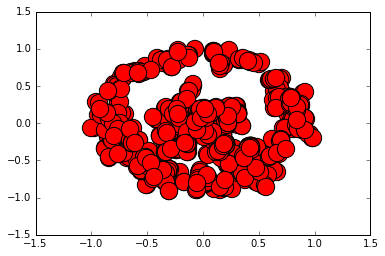

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

GraphSet = CA_Test[['vendor', 'name', 'amount']]
CAgraph = nx.from_pandas_dataframe(GraphSet, 'name', 'vendor', edge_attr='amount')#, create_using=nx.MultiGraph())

MultiGraph = nx.MultiGraph(CAgraph)
pos=nx.spring_layout(CAgraph)

# nx.draw_networkx_nodes(CAgraph,pos,
#                        nodelist=[CAgraph.graph['name']],
#                        node_color='r',
#                        node_size=500,
#                    alpha=0.8)
# nx.draw_networkx_nodes(G,pos,
#                        nodelist=[CAgraph.graph['vendor']],
#                        node_color='b',
#                        node_size=500,
#                    alpha=0.8)


nx.draw_networkx(MultiGraph, pos, with_labels=False)

#Some nodes are more central than others, and all are highly interconnected, as many PACS have vendors in common and reuse local vendors across multiple eleciton cycles.

In [81]:
nx.write_gexf(MultiGraph, 'CA_PACMulti.gexf')
 

In [70]:
len(CAgraph.edges())

1480

In [7]:
# SQL Alchemy would possibly work better to simplify queries and to build interactive apps on top of; however, the underlying SQL dataset simply won't play nicely with the ORM

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Date, Boolean, Float, MetaData, ForeignKey
from sqlalchemy.orm import relationship, backref

# Apply an Object Relation Mapper (ORM) to simplify querying and reporting from the database
Base = declarative_base()

# Political Action Committees (PACs) receive many donations as distinct groups and also disburse many expenditures to different vendors
# Thus, PAC_Group, locations and expenditures have many-to-many relationships. 
# If incoming donations are included in future scrapes, they should be an additional class/node

class PAC_Group(Base):
    __tablename__ = 'committees'
#     __table_args__ = {'autoload' :True}
    fecId = Column(String, primary_key=True) # Does this need to be a table of unique values?
    name = Column(String)
    lastActivity = Column(Date)
    expenditures = relationship("Expenditure", secondary='Pac_Expenditures')

class Expenditure(Base):
    __tablename__ = 'forms_expenditures'
#     __table_args__ = {'autoload' :True}
    formId = Column(Integer, primary_key=True)
    fecId = Column(String, ForeignKey('committees.fecId'))
    PAC = relationship("PAC_Group", secondary='Pac_Expenditures')
    formType = Column(String)
    amount = Column(Float)
    date = Column(Date)
    office = Column(String)
    state = Column(String)
    district = Column(String)
    vendor = Column(String)
    amended = Column(Boolean)

# This throws an error - perhaps b/c fecId needs to be only unique values in committees? 
# class PAC_Expenditure(Base):
#     __tablename__ = 'Pac_Expenditures'
#     PAC_id = Column(Integer, ForeignKey('committees.fecId'), primary_key=True)
#     Expense_id = Column(Integer, ForeignKey('forms_expenditures.fecId'), primary_key=True)

# Create Candidate class and link use District as the primary key?
        
class Location(Base):
    __tablename__='forms_expenditures_locations'
#     __table_args__ = {'autoload' :True}
    formId = Column(Integer, primary_key=True)
    addressType = Column(String)
    state = Column(String)
    city = Column(String)
    street1 = Column(String)
    street2 = Column(String)
    zipCode = Column(Integer)
    latLng = Column(Integer)
    hash = Column(String) 

class Zipcode(Base):
    __tablename__='zipcodes'
#     __table_args__ = {'autoload' :True}
    zip = Column(Integer, primary_key=True)
    city = Column(String)
    state = Column(String)
    latitude = Column(Integer)
    longitude = Column(Integer)

# Add forms and inclue 'expenditurePurposeDescrip'
# class Forms(Base):
#     __tablename__='forms'

In [10]:
import time
start_time = time.time()

from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import select
from sqlalchemy import distinct, func, create_engine

engine = create_engine('')

session = sessionmaker()
session.configure(bind=engine)
Base.metadata.create_all(engine)

session = Session()

for u in session.query(PAC_Group.name).order_by(PAC_Group.lastActivity)[1:3]:
    print(u)
    
# count distinct "name" values
numPAC = session.query(func.count(distinct(PAC_Group.name)))
numVen = session.query(func.count(distinct(Expenditure.vendor)))
print numPAC.scalar()
print numVen.scalar()

print("--- %s seconds ---" % (time.time() - start_time))

(u'Missouri Right to Life Federal Political Action Committee',)
(u'FRIENDS OF JON RUSSELL COMMITTEE',)
9974
744036


In [ ]:
# How to tell how large samples will be on local disk, server-side? 
# Recreate Justin's tables as summary stats
# Subset States and national Senate, Presidential races, etc. for extra summary stats and training datasets. 
# Labels to predict: State/Location, Candidate/Issue, Amount, kind of service vendors purchase
# How to re-run and improve the model as new data is added?